# Better optimizers (compared to SGD) to improve speed and accuracy

- We discuss popular alternatives to stochastic gradient descent (SGD):
    - momentum optimization
    - Nesterov Accelerated Gradient
    - AdaGrad 
    - RMSPropa
    - finally Adam and Nadam optimization.
- We also discuss _learning rate scheduling_ through which we could change the learning rate over different epochs or over each training batch to speedup convergence.

## 1.Momentum Optimization

- Recall that Gradient Descent updates the weights θ by directly subtracting the gradient of the cost function J(θ) with regard to the weights (∇θJ(θ)) multiplied by the learning rate η. The equation is: θ ← θ – η∇θJ(θ). It does not care about what the earlier gradients were. If the local gradient is tiny, it goes very slowly.
- Momentum optimization cares a great deal about what previous gradients were: at each iteration, it subtracts the local gradient from the momentum vector m (multiplied by the learning rate η), and it updates the weights by adding this momentum vector.
- To simulate some sort of friction mechanism and prevent the momentum from growing too large, the algorithm introduces a new hyperparameter β, called the momentum, which must be set between 0 (high friction) and 1 (no friction). A typical momentum value is 0.9.
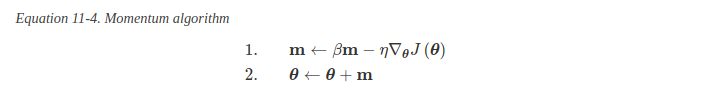
- Gradient Descent goes down the steep slope quite fast, but then it takes a very long time to go down the valley. In contrast, momentum optimization will roll down the valley faster and faster until it reaches the bottom (the optimum). In deep neural networks that don’t use Batch Normalization, the upper layers will often end up having inputs with very different scales, so using momentum optimization helps a lot.
- It can also help roll past local optima.
- Due to the momentum, the optimizer may overshoot a bit, then come back, overshoot again, and oscillate like this many times before stabilizing at the minimum. This is one of the reasons it’s good to have a bit of friction in the system: it gets rid of these oscillations and thus speeds up convergence.

### Implementation in Keras

In [2]:
import tensorflow as tf
from tensorflow import keras
#defining the optimizer with momentum
optimizer_mom = keras.optimizers.SGD(lr=0.001, momentum=0.9)
#We can pass this optimizer to a keras model while compiling it.
dummy_model = keras.models.Sequential([  
                  keras.layers.Dense(30, activation="relu"),  
                  keras.layers.Dense(1)  
                  ])
dummy_model.compile(optimizer = optimizer_mom, loss=["mse"])

## 2. Nesterov Accelerated Gradient (NAG) method

- This is a small varient of the momentum optimization. 
- NAG measure the gradient of the cost function at a slightly different point, namely $\theta + \beta m$ instead of $\theta$ 
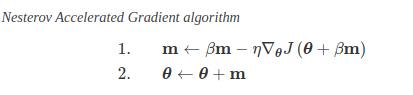

- This new direction manages to point in the direction of the minimum , relatively bette compared to the gradient evaluated at $\theta$
- As a result, NAG is generally faster than momentum optimizer. 
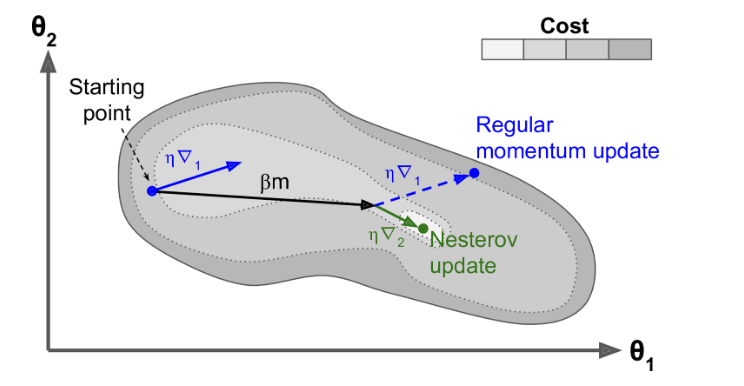
### Implementation in Keras

In [4]:
optimizer_nag = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## 3.AdaGrad (Adaptive Gradient) (Do not use: use RMSProp instead)

- In short, this algorithm decays the learning rate, but it does so faster for steep dimensions than for dimensions with gentler slopes. This is called an adaptive learning rate. It helps point the resulting updates more directly toward the global optimum.
- One additional benefit is that it requires much less tuning of the learning rate hyperparameter η.
- __Do not use__ this method, since it decays the learnin rate very fast, use RMSProp instead.


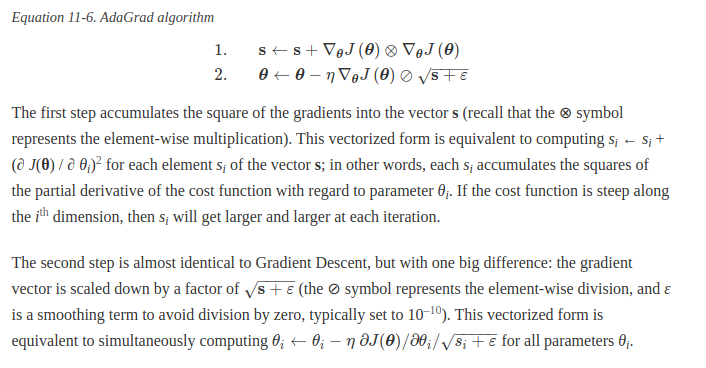

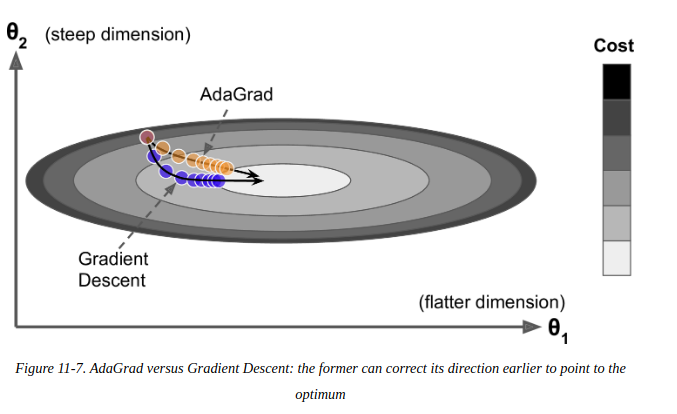

## 4.RMSProp

- The RMSProp algorithm fixes the learning step decay of AdaGrad by accumulating only the gradients from the most recent iterations. 
- It does so by using exponential decay in the first step. 
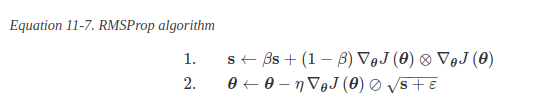

- The decay rate $\beta$ is typically set to 0.9.

### Implementation in keras 

In [5]:
optimizer_RMSProp = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
#note that the rho above corresponds to beta in the algorithm above.

## 5. Adam and Nadam Optimization

- Adam which stands for adaptive moment estimation, combines the ideas of momentum optimization and RMSProp: just like momentum optimization, it keeps track of an exponentially decaying average of past gradients; and just like RMSProp, it keeps track of an exponentially decaying average of past squared gradients.  
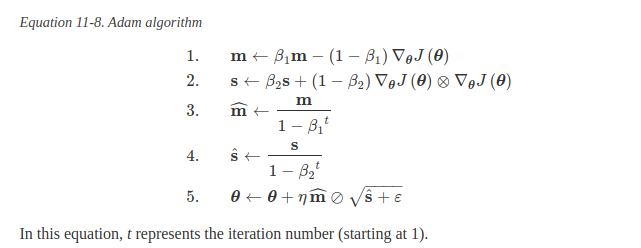


### Implementation in keras

In [6]:
optimizer_adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

__AddaMax and Nadam are two varients of Adam__

### Optimizer Comparison
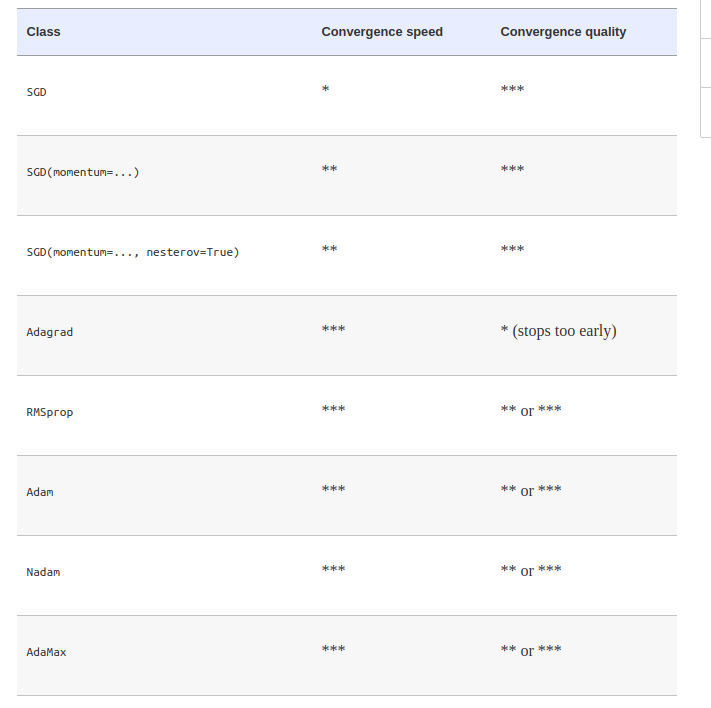

## Learning Rate Scheduling

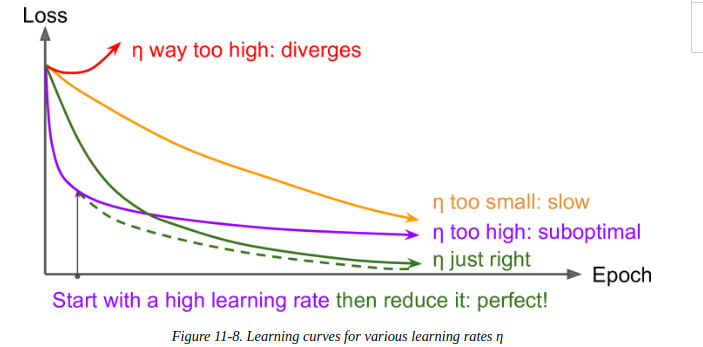

#### Power Scheduling

- Set the learning rate to a function of the iteration number t: η(t) = η0 / (1 + t/s)c. 
- The initial learning rate η0, the power c (typically set to 1), and the steps s are hyperparameters. The learning rate drops at each step. After s steps, it is down to η0 / 2. After s more steps, it is down to η0 / 3, then it goes down to η0 / 4, then η0 / 5, and so on. 
- As you can see, this schedule first drops quickly, then more and more slowly. Of course, power scheduling requires tuning η0 and s (and possibly c).

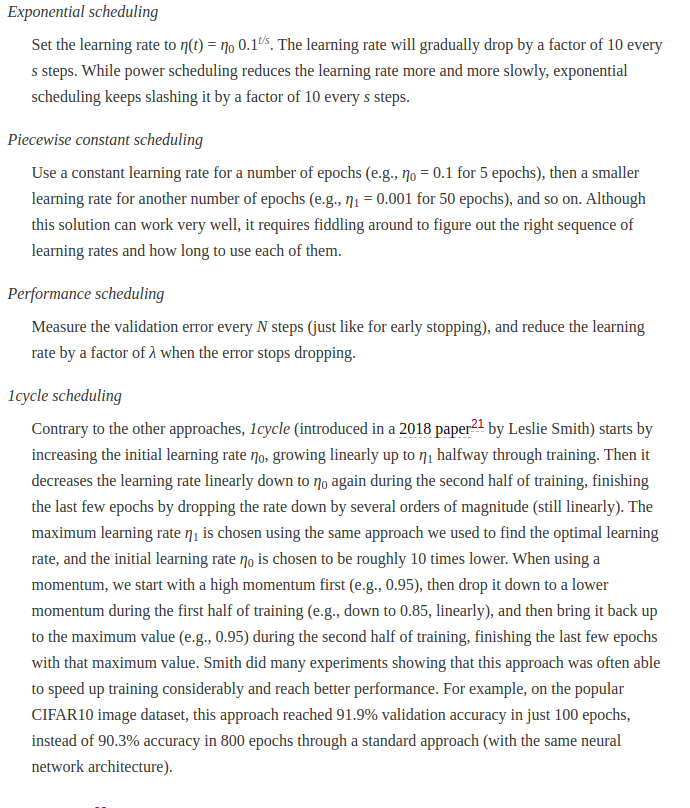

### Implementing learning rate scheduling in Keras 

In [8]:
# Power scheduling with s = 1/decay
optimizer_power_sc = keras.optimizers.SGD(lr=0.001,decay=1e-4)


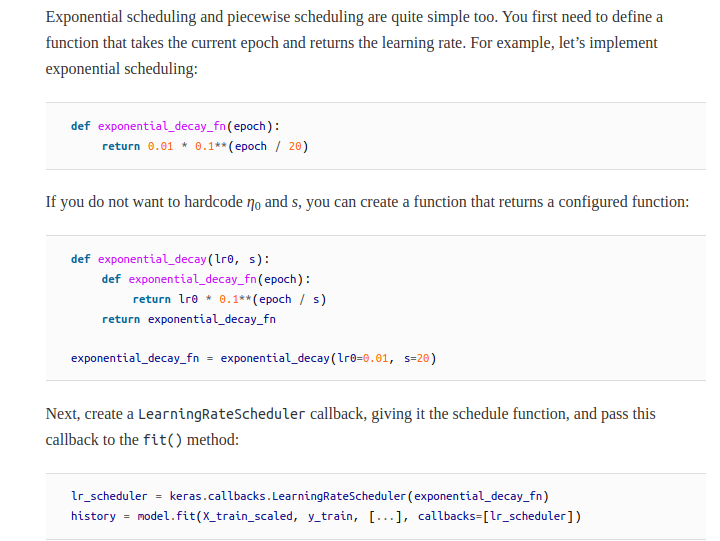

- For piecewise constant scheduling, you can use a schedule function like the following one (as earlier, you can define a more general function if you want; see the “Piecewise Constant Scheduling” section of the notebook for an example), then create a LearningRateScheduler callback with this function and pass it to the fit() method, just like we did for exponential scheduling:
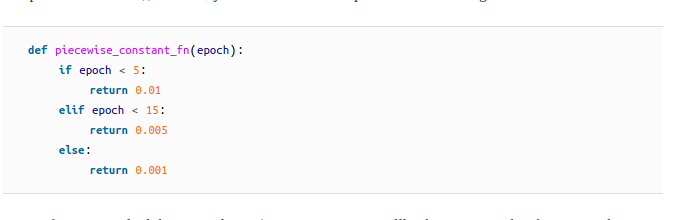